### TIME DATA VISUALIZATION

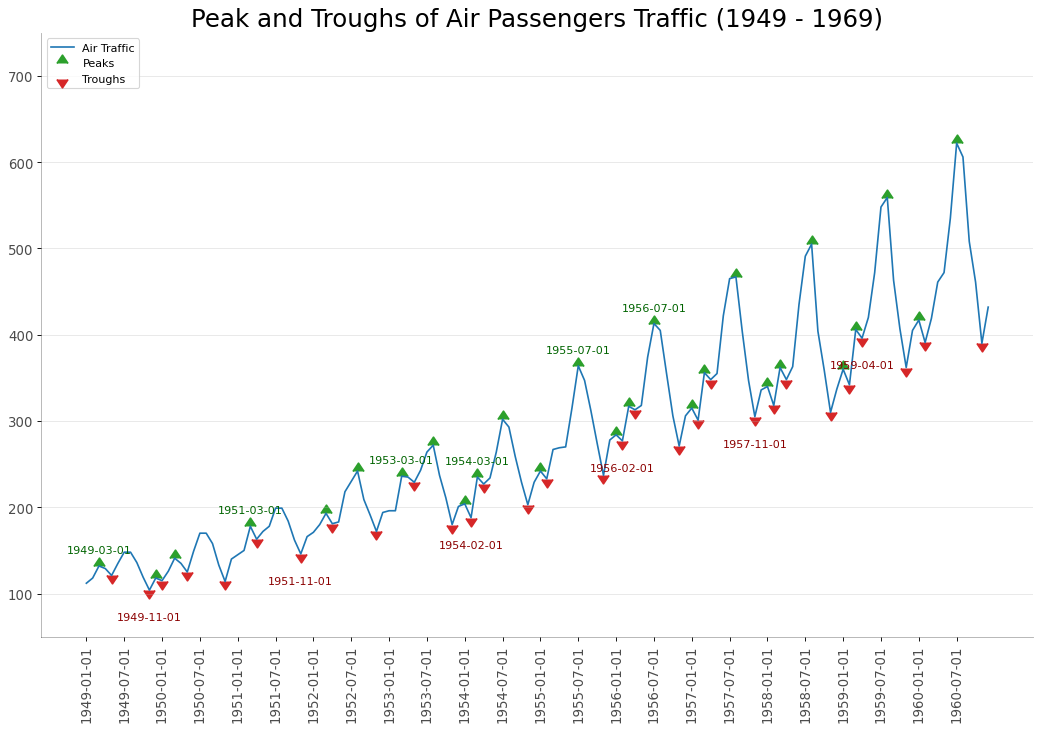

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# Import Data
df = pd.read_csv('AirPassengers.csv')

# Get the Peaks and Troughs
data = df['value'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'value', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.date[peak_locations], df.value[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.value[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.value[p]+15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.value[t]-35, df.date[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

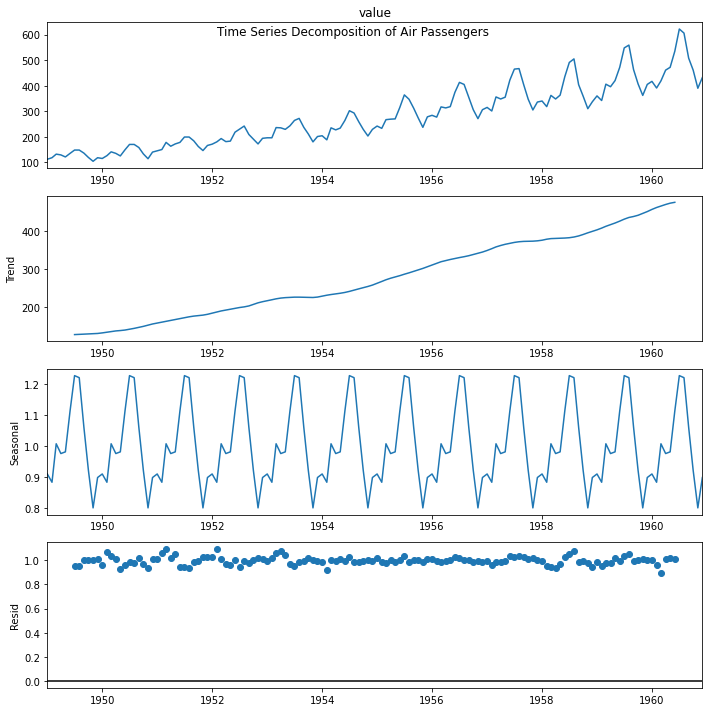

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('AirPassengers.csv')
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)

# Decompose 
result = seasonal_decompose(df['value'], model='multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('\nTime Series Decomposition of Air Passengers')
plt.show()

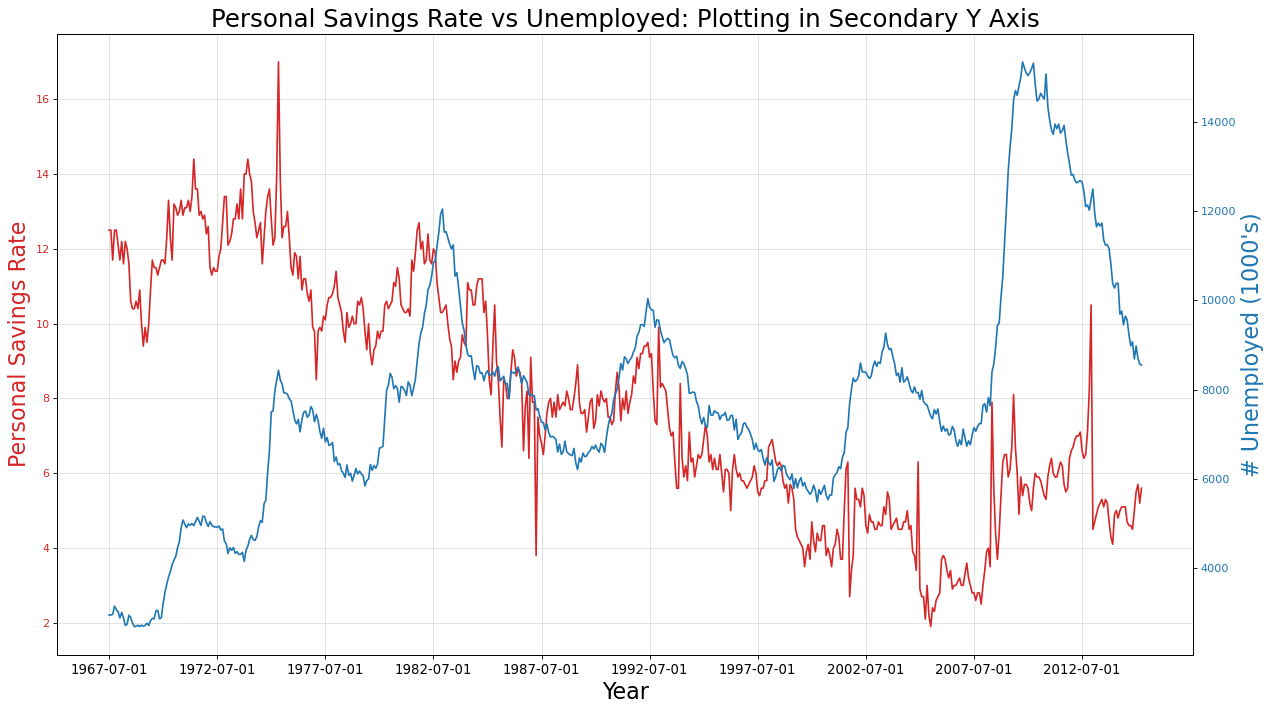

In [3]:
# Import Data
df = pd.read_csv("economics.csv")

x = df['date']
y1 = df['psavert']
y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=22)
fig.tight_layout()
plt.show()

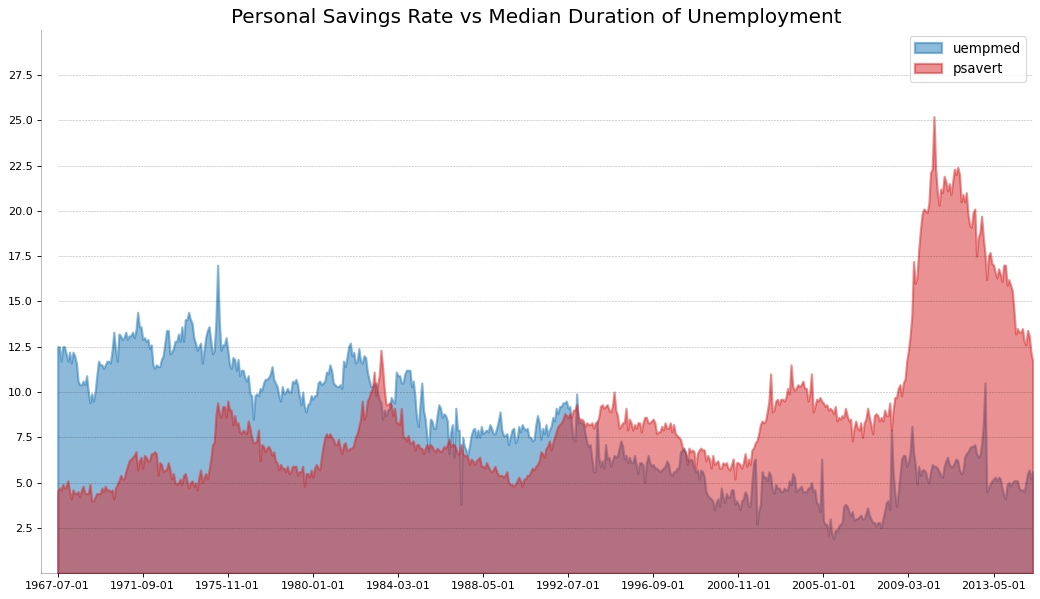

In [4]:
# Import Data
df = pd.read_csv("economics.csv")

# Prepare Data
x = df['date'].values.tolist()
y1 = df['psavert'].values.tolist()
y2 = df['uempmed'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['psavert', 'uempmed']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Personal Savings Rate vs Median Duration of Unemployment', fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim(-10, x[-1])

# Draw Tick lines  
for y in np.arange(2.5, 30.0, 2.5):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()